In [94]:
from skopt import gp_minimize
import numpy as np
import matplotlib.pyplot as plt
import toy2bo
import pandas as pd

In [96]:
df = pd.read_csv("biondiPallunits.csv")

In [157]:
df.head()
units = ["Heater", "Reactor_1", "Reactor_2", "Still"]
costs = [df.loc[df["unit"] == j, "cost"] for j in units]
cost = [sum(i) for i in zip(*costs)]
eps = df.loc[df["unit"] == "Heater", "eps"]
eps = [[e] for e in eps]
df.lo

['1', '6', '8', ']', '5', ',', '[', '0', '4', '7', '3', '.', '2', '9', ' ']

In [219]:
def target(x):
    # return 1 - np.exp(-abs(x[0]))
    y = 250000*x[0]**2 - 100000*x[0] + 20000
    return y/30000

noise_level = 0.02
x = np.linspace(0.0, 0.65, 40).reshape(-1, 1)
y = [target([xi]) for xi in x]
# xp = eps
xp = x.tolist()
# yp = np.divide(cost,30000)
yp = yprior
bo = gp_minimize(target, [(0.0,0.65)], acq_func="EI", n_calls=40,
                 n_random_starts=0, noise=0.01, x0=xp, y0=yp)


/home/jw3617/.local/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:384: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


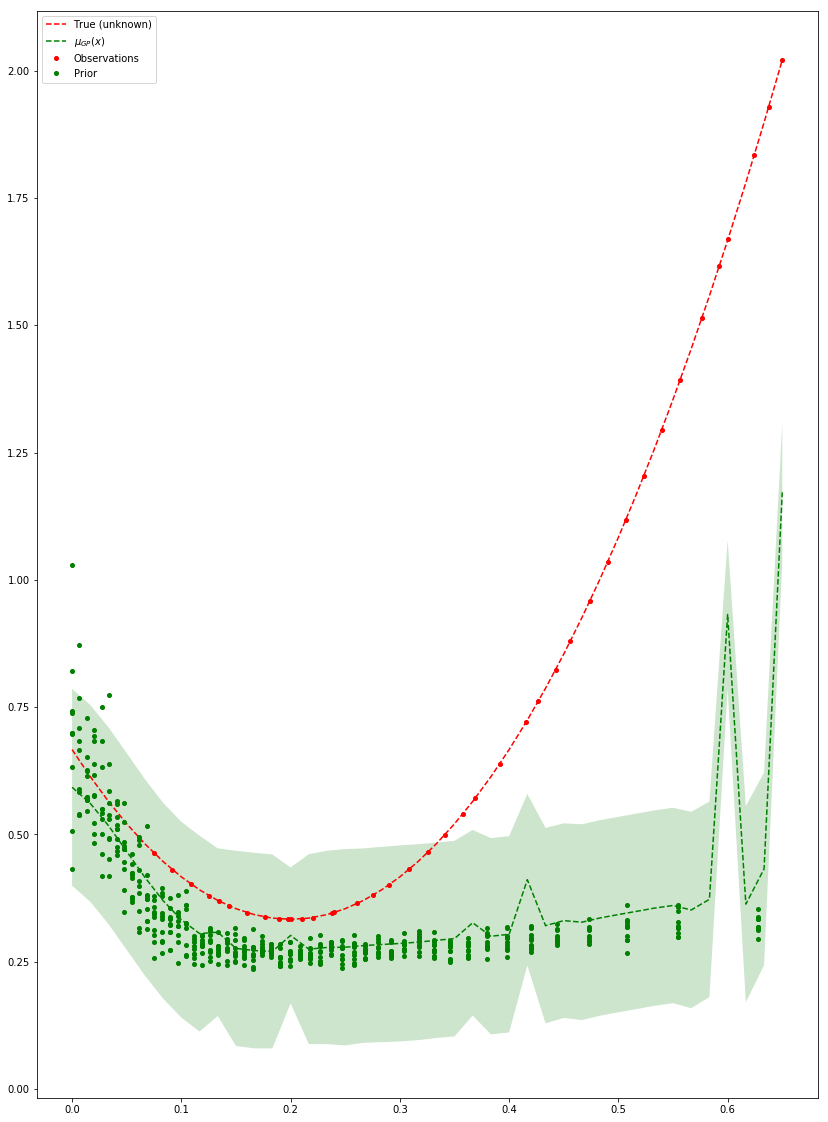

In [229]:
n_iter = 40
plt.plot(x, y, "r--", label="True (unknown)")
x_gp = bo.space.transform(x.tolist())
gp = bo.models[n_iter]
Ni = len(xp)
curr_x_iters = bo.x_iters[Ni:Ni+n_iter]
curr_func_vals = bo.func_vals[Ni:Ni+n_iter]
y_pred, sigma = gp.predict(x_gp, return_std=True)
plt.plot(x, y_pred, "g--", label=r"$\mu_{GP}(x)$")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc="g", ec="None")

# Plot sampled points
plt.plot(curr_x_iters, curr_func_vals,
         "r.", markersize=8, label="Observations")
plt.plot(eps, np.divide(cost,30000), "g.", markersize=8, label="Prior")
plt.legend()
plt.show()

In [222]:
len(xp)

40

In [2]:
# bo = gp_minimize(toy2bo.target, [(0.05,0.5)], acq_func="EI", n_calls=30, n_random_starts=10, noise = 0.02)
bo = gp_minimize(target, [(0.05,0.5)], acq_func="EI", n_calls=30, n_random_starts=10, noise = 0.02)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.7.1.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile '/home/jw3617/STN/results/toy2R0.34_0STN.log' open.
CPLEX> Problem '/tmp/tmpop7nfzrv.pyomo.lp' read.
Read time = 0.00 sec. (0.32 ticks)
CPLEX> Problem name         : /tmp/tmpop7nfzrv.pyomo.lp
Objective sense      : Minimize
Variables            :    3002  [Nneg: 2676,  Binary: 282,  General Integer: 44]
Objective nonzeros   :       3
Linear constraints   :    2322  [Less: 1914,  Greater: 19,  Equal: 389]
  Nonzeros           :   10633
  RHS nonzeros       :     321

Variables            : Min LB: 0.000000         Max UB: 1.000000       
Objective nonzeros   : Min   : 1.000000         Max   : 10

*     0+    0                       792550.8387     1063.5699            99.87%
      0     0     1064.5225    30   792550.8387      Cuts: 11     1025   99.87%
      0     0     1065.2488    35   792550.8387      Cuts: 21     1073   99.87%
      0     0     1065.5042    32   792550.8387       Cuts: 9     1080   99.87%
*     0+    0                       792532.0887     1065.5042            99.87%
      0     2     1065.5042    25   792532.0887     1065.5042     1080   99.87%
Elapsed time = 0.40 sec. (207.25 ticks, tree = 0.01 MB, solutions = 4)
*    32+    4                       792494.5887     1077.0307            99.86%
*    56+    6                       791916.8915     1077.0307            99.86%
*    56+    7                       123912.2624     1077.0307            99.13%
*    63+    7                         1473.8110     1077.0307            26.92%
*   203+   68                         1256.9644     1077.0307            14.31%
*   327   114      integral     0     1237.6587  

CPLEX> # ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpoph3y8e0
  Lower bound: 866.61227718
  Upper bound: 866.6228313644096
  Number of objectives: 1
  Number of constraints: 2322
  Number of variables: 3002
  Number of nonzeros: 10629
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 1.6
  Termination condition: optimal
  Termination message: MIP - Integer optimal, tolerance (0.0001/1e-06)\x3a Objective = 8.6662283136e+02
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 4146
      Number of created subproblems: 4146


*     0+    0                      1790910.0000      697.0095            99.96%
      0     0      756.4625    29  1790910.0000      Cuts: 39      991   99.96%
      0     0      757.8519    33  1790910.0000      Cuts: 27     1136   99.96%
      0     0      761.1295    40  1790910.0000       Cuts: 9     1224   99.96%
      0     0      761.6426    42  1790910.0000      Cuts: 39     1271   99.96%
      0     0      761.9233    40  1790910.0000      Cuts: 18     1301   99.96%
      0     0      761.9233    40  1790910.0000       Cuts: 3     1307   99.96%
*     0+    0                       289654.7566      761.9233            99.74%
      0     0      767.2857    40   289654.7566     Covers: 1     1366   99.73%
      0     0      770.4215    39   289654.7566      Cuts: 35     1415   99.73%
      0     0      771.6532    35   289654.7566      Cuts: 22     1457   99.73%
      0     0      772.0037    40   289654.7566      Cuts: 10     1479   99.73%
      0     0      772.1660    41   2896

CPLEX> # ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpvy013zfq
  Lower bound: 553.2098523366843
  Upper bound: 553.2098523366843
  Number of objectives: 1
  Number of constraints: 2322
  Number of variables: 3002
  Number of nonzeros: 10623
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.72
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = 5.5320985234e+02
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1024
      Number of created subproblems: 1024
  Error rc:

      0     0      286.7980    10      294.3391       Cuts: 3      659    2.56%
      0     0      286.8834    13      294.3391      Cuts: 17      680    2.53%
      0     0      287.0128    13      294.3391      Cuts: 10      693    2.49%
      0     0      287.0407    14      294.3391      Cuts: 10      701    2.48%
      0     0      287.0809    15      294.3391       Cuts: 6      705    2.47%
      0     0      287.0809    15      294.3391       Cuts: 3      708    2.47%
      0     2      287.0809    14      294.3391      287.0809      708    2.47%
Elapsed time = 0.32 sec. (201.18 ticks, tree = 0.02 MB, solutions = 3)

Clique cuts applied:  2
Implied bound cuts applied:  3
Flow cuts applied:  11
Mixed integer rounding cuts applied:  3
Lift and project cuts applied:  1
Gomory fractional cuts applied:  2

Root node processing (before b&c):
  Real time             =    0.30 sec. (200.55 ticks)
Parallel b&c, 8 threads:
  Real time             =    0.15 sec. (3.57 ticks)
  Sync time (a

   5694  1048     1091.6569     8     1130.3902     1088.1280    92206    3.74%
*  6691  1222      integral     0     1112.8902     1092.9908   114662    1.79%
   6908   896    infeasible           1112.8902     1092.9908   120501    1.79%
   7947   694        cutoff           1112.8902     1099.0631   139248    1.24%

GUB cover cuts applied:  2
Clique cuts applied:  3
Implied bound cuts applied:  5
Flow cuts applied:  25
Mixed integer rounding cuts applied:  80
Lift and project cuts applied:  7
Gomory fractional cuts applied:  28

Root node processing (before b&c):
  Real time             =    0.45 sec. (259.69 ticks)
Parallel b&c, 8 threads:
  Real time             =    4.75 sec. (2882.38 ticks)
  Sync time (average)   =    1.02 sec.
  Wait time (average)   =    0.02 sec.
                          ------------
Total (root+branch&cut) =    5.20 sec. (3142.07 ticks)

Solution pool: 23 solutions saved.

MIP - Integer optimal, tolerance (0.0001/1e-06):  Objective =  1.1128902255e+03
Curr

CPLEX> # ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp1bwf1tvi
  Lower bound: 1107.8184916
  Upper bound: 1107.8902254901257
  Number of objectives: 1
  Number of constraints: 2322
  Number of variables: 3002
  Number of nonzeros: 10631
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 3.6
  Termination condition: optimal
  Termination message: MIP - Integer optimal, tolerance (0.0001/1e-06)\x3a Objective = 1.1078902255e+03
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 8648
      Number of created subproblems: 8648

      0     0      761.7267    23   700725.8497    MIRcuts: 1      964   99.89%
      0     0      761.8317    20   700725.8497       Cuts: 4      986   99.89%
      0     0      761.8317    20   700725.8497       Cuts: 7      996   99.89%
*     0+    0                       431458.5500      761.8317            99.82%
*     0+    0                       271150.8497      762.7270            99.72%
      0     2      761.8317    20   271150.8497      762.7270      996   99.72%
Elapsed time = 0.39 sec. (204.48 ticks, tree = 0.01 MB, solutions = 5)
*    65    20      integral     0     1081.8497      763.2800     2037   29.45%
*   185    92      integral     0      908.2632      763.3423     3703   15.96%
   1141   629      881.2410     4      908.2632      777.0706    13357   14.44%
*  2910+ 1479                          897.5000      795.7597            11.34%
   3209  1569      817.3717    10      897.5000      797.6261    38961   11.13%
   3425  1691      815.8690    37      897.5000  

CPLEX> # ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpxwe16em1
  Lower bound: 494.32536541257156
  Upper bound: 494.32536541257156
  Number of objectives: 1
  Number of constraints: 2322
  Number of variables: 3002
  Number of nonzeros: 10625
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.89
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = 4.9432536541e+02
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1874
      Number of created subproblems: 1874
  Error r

      0     0      464.4064    18      496.9808      Cuts: 22      753    6.55%
      0     0      464.7143    16      496.9808      Cuts: 17      803    6.49%
      0     0      464.9627    16      496.9808      Cuts: 18      816    6.44%
      0     0      465.6612    15      496.9808      Cuts: 13      833    6.30%
      0     0      465.6612    12      496.9808       Cuts: 6      836    6.30%
      0     0      465.6612    18      496.9808      Cuts: 19      858    6.30%
*     0+    0                          495.7308      465.6612             6.07%
      0     2      465.6612    17      495.7308      465.6612      858    6.07%
Elapsed time = 0.38 sec. (228.87 ticks, tree = 0.01 MB, solutions = 5)
*  1128+  501                          490.7308      468.5723             4.52%
   1554   678        cutoff            490.7308      469.0247    27085    4.42%
   3522  1094        cutoff            490.7308      477.9488    55340    2.60%
   5981   710        cutoff            490.7308  

MCS Heater
MCS Reactor
Time taken:20.107156991958618
  ID     alpha   epsilon Pheater  Preactor  CostStorage  CostMaintenance  \
0  0  0.337350  0.113321       0     22.59         15.0            900.0   
1  1  0.458226  0.028324       0     20.24         15.0            900.0   

          Cost        Cost0  Dslack  timeTotal infeasible  
0  1209.339082  1166.622831     0.0  49.528626      False  
1  1117.998628  1112.890225     0.0  51.544654      False  

Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 12.7.1.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2017.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile '/home/jw3617/STN/results/toy2R0.28_0STN.log' open.
CPLEX> Problem '/tmp/tmpb6ejpqd9.pyomo.lp' read.
Read time = 0.01 sec. (0.32 ticks)
CPL

      0     0     1061.5505    23   784706.6589       Cuts: 2     1041   99.86%
      0     0     1061.5505    24   784706.6589    MIRcuts: 3     1043   99.86%
*     0+    0                         1627.8036     1061.5505            34.79%
*     0+    0                         1412.6000     1066.7658            24.48%
*     0+    0                         1288.7500     1066.7658            17.22%
      0     2     1061.5505    23     1288.7500     1066.7658     1043   17.22%
Elapsed time = 0.38 sec. (223.10 ticks, tree = 0.01 MB, solutions = 7)
*    44+    3                         1248.7500     1077.4366            13.72%
*   201+  111                         1223.1564     1077.4366            11.91%
*   447+  187                         1203.1564     1077.4366            10.45%
*  1053+  322                         1184.4064     1078.7955             8.92%
*  1201+  320                         1178.7500     1079.2849             8.44%
   1211   465     1088.8647    19     1178.7500  

   3367    46        cutoff           1171.3036     1110.3611    99292    5.20%
   4101   402     1164.4266    13     1171.3036     1111.1391   111979    5.14%
   5013  1013     1164.4266    14     1171.3036     1113.4408   139663    4.94%
   5841  1538     1164.4266    17     1171.3036     1119.9002   170825    4.39%
   7010  2034     1134.4597    12     1171.3036     1126.7039   199008    3.81%
  13189  4123        cutoff           1171.3036     1143.8116   309471    2.35%
Elapsed time = 6.51 sec. (4211.66 ticks, tree = 3.36 MB, solutions = 16)
  18696  3230     1165.9022     7     1171.3036     1157.3849   426958    1.19%
  23503  3615        cutoff           1171.3036     1164.4266   536327    0.59%
  29835  3241        cutoff           1171.3036     1165.3879   642356    0.51%

GUB cover cuts applied:  1
Cover cuts applied:  4
Implied bound cuts applied:  3
Flow cuts applied:  32
Mixed integer rounding cuts applied:  65
Zero-half cuts applied:  5
Lift and project cuts applied:  10

CPLEX> # ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp8114__sb
  Lower bound: 874.3762746
  Upper bound: 874.459966006538
  Number of objectives: 1
  Number of constraints: 2322
  Number of variables: 3002
  Number of nonzeros: 10627
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 4.39
  Termination condition: optimal
  Termination message: MIP - Integer optimal, tolerance (0.0001/1e-06)\x3a Objective = 8.7445996601e+02
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 8647
      Number of created subproblems: 8647
 

      0     0      526.6642    17   500597.3454    MIRcuts: 6      954   99.89%
      0     0      528.3436    15   500597.3454      Cuts: 14      983   99.89%
      0     0      528.3436    14   500597.3454    MIRcuts: 1      984   99.89%
*     0+    0                          604.2517      528.3436            12.56%
*     0+    0                          584.2517      528.3436             9.57%
      0     2      528.3436     3      584.2517      528.3436      984    9.57%
Elapsed time = 0.35 sec. (216.81 ticks, tree = 0.01 MB, solutions = 7)
*    77+   36                          581.7517      528.3436             9.18%
*    86    66      integral     0      559.2517      528.3436     2893    5.53%
*    99+   64                          559.2517      528.3436             5.53%
   1328   306      550.9717     2      559.2517      540.3320    31537    3.38%

Clique cuts applied:  1
Implied bound cuts applied:  35
Flow cuts applied:  7
Mixed integer rounding cuts applied:  24
Lift and 

CPLEX> # ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpca7zqz1j
  Lower bound: 572.39483661
  Upper bound: 572.4134754014596
  Number of objectives: 1
  Number of constraints: 2322
  Number of variables: 3002
  Number of nonzeros: 10621
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 1.12
  Termination condition: optimal
  Termination message: MIP - Integer optimal, tolerance (0.0001/1e-06)\x3a Objective = 5.7241347540e+02
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 726
      Number of created subproblems: 726
 

SystemExit: -15

/home/jw3617/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


  Signal handler called from  /usr/lib/python3.5/multiprocessing/popen_fork.py poll 29
  Waiting...
  Signal 2 recieved, but no process queued
  Exiting now
  Signal handler called from  <frozen importlib._bootstrap_external> find_spec 1224
  Waiting...
  Signal 2 recieved, but no process queued


SystemExit: -2

/home/jw3617/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


  Exiting now


In [14]:
import matplotlib.pyplot as plt
import numpy as np

from skopt.acquisition import gaussian_ei
plt.rcParams["figure.figsize"] = (14, 20)
res = bo

x = np.linspace(0.05, 0.5, 100).reshape(-1, 1)
x_gp = res.space.transform(x.tolist())

# Plot the 5 iterations following the 5 random points
for n_iter in range(5):
    gp = res.models[19]
    curr_x_iters = res.x_iters[:29-n_iter*5]
    curr_func_vals = res.func_vals[:29-n_iter*5]

    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)

    # Plot GP(x) + contours
    y_pred, sigma = gp.predict(x_gp, return_std=True)
    plt.plot(x, y_pred, "g--", label=r"$\mu_{GP}(x)$")
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma, 
                             (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.2, fc="g", ec="None")

    # Plot sampled points
    plt.plot(curr_x_iters, curr_func_vals,
             "r.", markersize=8, label="Observations")
    
    # Adjust plot layout
    plt.grid()

    if n_iter == 0:
        plt.legend(loc="best", prop={'size': 6}, numpoints=1)
        
    if n_iter != 4:
        plt.tick_params(axis='x', which='both', bottom='off', 
                        top='off', labelbottom='off') 

    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    acq = gaussian_ei(x_gp, gp, y_opt=np.min(curr_func_vals))
    plt.plot(x, acq, "b", label="EI(x)")
    plt.fill_between(x.ravel(), -2.0, acq.ravel(), alpha=0.3, color='blue')
    
    next_x = res.x_iters[5+n_iter]
    next_acq = gaussian_ei(res.space.transform([next_x]), gp, y_opt=np.min(curr_func_vals))
    plt.plot(next_x, next_acq, "bo", markersize=6, label="Next query point")
    
    # Adjust plot layout
    plt.ylim(0, 0.003)
    plt.grid()
    
    if n_iter == 0:
        plt.legend(loc="best", prop={'size': 6}, numpoints=1)
        
    if n_iter != 4:
        plt.tick_params(axis='x', which='both', bottom='off', 
                        top='off', labelbottom='off') 

plt.show()


IndexError: list index out of range

In [ ]:
x = [bo.x_iters[i][0] for i in range(0,len(bo.x_iters))]
y = bo.func_vals
plt.scatter(x,y)

In [ ]:
bo.x_iters